# Homework 1 (Solution)
People often say that you must understand the tradition before you can innovate. This
homework has ONE problem that revisits the toy example discussed in class and asks you
to perform both supervised and unsupervised learning, through parametric and non-
parametric approaches. You must strictly follow the instructions and provide the required
outputs at each step. The only file you should submit is the notebook.

**424 students: Use Mary’s rating only, hence a 1-dimensional classification problem**

**525 students: Use both Mary and John’s ratings, hence a 2-dimensional classification
problem**

**Problem:** It is Friday night and you’d like to watch a movie. You are considering “Gravity”
and want to choose a movie you are likely to enjoy. You do not want to spend an hour of
your weekend watching a movie only to discover that you dislike it. To help decide, you
called your two friends, Mary and John, and ask for their ratings of “Gravity”, which they
provide. You are also aware of their ratings for 11 other movies that you have already
watched and know whether you “liked” or “disliked”.

**Training Data:**

    •   Movies that Mary rated that I liked, [2.5, 3.5, 3.5, 4.5, 4.5]
    •   Movies that John rated that I liked, in the same order as above, [5, 5, 4, 5, 4]
    •   Movies that Mary rated that I disliked, [1, 1, 1.5, 2.5, 2.5, 2.5]
    •   Movies that John rated that I disliked, in the same order as above, [5, 4, 4, 3, 1.5, 1]

**Testing Data:**

    •   Mary’s rating for “Gravity” is 3
    •   John’s rating for “Gravity” is 3

**Question:**

    •   Should I watch “Gravity”? (or put it another way: will I “like” or “dislike” Gravity?)

You will solve the problem using four learning approaches. Please follow the step-by-step
guidance to help yourself make a decision.

## IMPORTANT NOTES
1. Set your course number in the cell below.
  - **COSC 424 students:** Set `COURSE = 424` (1-dimensional classification using Mary's rating only)
  - **COSC 525 students:** Set `COURSE = 525` (2-dimensional classification using both Mary and John's ratings)

In [127]:
# ============================================================
# SET YOUR COURSE NUMBER HERE (424 or 525)
# ============================================================

COURSE = 525

# ============================================================

# Validate course selection
assert COURSE in [424, 525], "COURSE must be either 424 or 525"
print(f"Course selected: COSC {COURSE}")

Course selected: COSC 525


## Approach 1: Supervised parametric learning, assuming pdf is Gaussian

### a) Provide the scatter plot of both the training and testing set in the same fashion as shown in the lecture note.

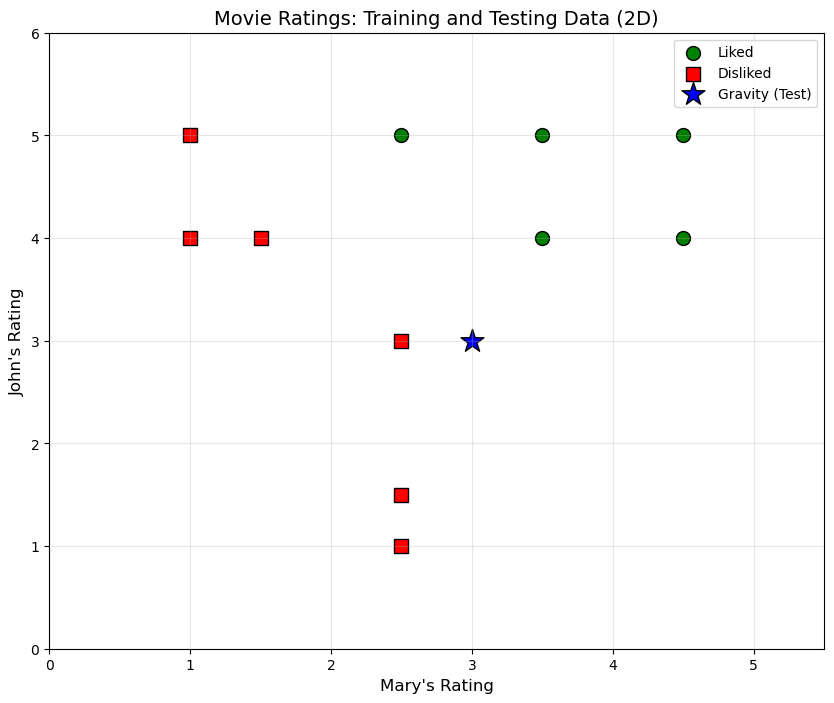

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# Training Data
mary_liked = np.array([2.5, 3.5, 3.5, 4.5, 4.5])
john_liked = np.array([5, 5, 4, 5, 4])
mary_disliked = np.array([1, 1, 1.5, 2.5, 2.5, 2.5])
john_disliked = np.array([5, 4, 4, 3, 1.5, 1])

if COURSE == 525:
    # Combine into 2D arrays (for 525 students)
    liked = np.column_stack((mary_liked, john_liked))
    disliked = np.column_stack((mary_disliked, john_disliked))
    # Testing Data (Gravity)
    test_point = np.array([3, 3])
else:
    # For 424 students: 1D arrays (Mary's ratings only)
    liked = mary_liked
    disliked = mary_disliked
    # Testing Data (Gravity) - Mary's rating only
    test_point = 3

# Scatter plot
plt.figure(figsize=(10, 8) if COURSE == 525 else (12, 4))

if COURSE == 525:
    plt.scatter(
        liked[:, 0],
        liked[:, 1],
        c="green",
        marker="o",
        s=100,
        label="Liked",
        edgecolors="black",
    )
    plt.scatter(
        disliked[:, 0],
        disliked[:, 1],
        c="red",
        marker="s",
        s=100,
        label="Disliked",
        edgecolors="black",
    )
    plt.scatter(
        test_point[0],
        test_point[1],
        c="blue",
        marker="*",
        s=300,
        label="Gravity (Test)",
        edgecolors="black",
    )
    plt.ylabel("John's Rating", fontsize=12)
    plt.ylim(0, 6)
else:
    # 1D plot for 424 students
    plt.scatter(
        liked,
        np.zeros_like(liked),
        c="green",
        marker="o",
        s=150,
        label="Liked",
        edgecolors="black",
    )
    plt.scatter(
        disliked,
        np.zeros_like(disliked),
        c="red",
        marker="s",
        s=150,
        label="Disliked",
        edgecolors="black",
    )
    plt.scatter(
        test_point,
        0,
        c="blue",
        marker="*",
        s=400,
        label="Gravity (Test)",
        edgecolors="black",
    )
    plt.ylim(-0.5, 0.5)
    plt.yticks([])

plt.xlabel("Mary's Rating", fontsize=12)
plt.title(
    f"Movie Ratings: Training and Testing Data ({'2D' if COURSE == 525 else '1D'})",
    fontsize=14,
)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 5.5)
plt.show()


### b) Assuming the training data for each category follows a Gaussian distribution. Provide the parameter values for each category. **(424 students: mean and std for each category; 525 students: mean vector and covariance matrix for each category)**

In [129]:
# Calculate mean vectors and covariance matrices for each category

if COURSE == 525:
    # Mean vectors
    mean_liked = np.mean(liked, axis=0)
    mean_disliked = np.mean(disliked, axis=0)

    # Covariance matrices (using ddof=1 for sample covariance)
    cov_liked = np.cov(liked.T)
    cov_disliked = np.cov(disliked.T)

    print("=== Liked Category ===")
    print(f"Mean vector (μ₁): {mean_liked}")
    print(f"Covariance matrix (Σ₁):\n{cov_liked}")

    print("\n=== Disliked Category ===")
    print(f"Mean vector (μ₂): {mean_disliked}")
    print(f"Covariance matrix (Σ₂):\n{cov_disliked}")
else:
    # 424: Mean and standard deviation (1D)
    mean_liked = np.mean(liked)
    mean_disliked = np.mean(disliked)

    # Standard deviations (using ddof=1 for sample std)
    std_liked = np.std(liked, ddof=1)
    std_disliked = np.std(disliked, ddof=1)

    print("=== Liked Category ===")
    print(f"Mean (μ₁): {mean_liked}")
    print(f"Standard Deviation (σ₁): {std_liked}")

    print("\n=== Disliked Category ===")
    print(f"Mean (μ₂): {mean_disliked}")
    print(f"Standard Deviation (σ₂): {std_disliked}")


=== Liked Category ===
Mean vector (μ₁): [3.7 4.6]
Covariance matrix (Σ₁):
[[ 0.7  -0.15]
 [-0.15  0.3 ]]

=== Disliked Category ===
Mean vector (μ₂): [1.83333333 3.08333333]
Covariance matrix (Σ₂):
[[ 0.56666667 -1.03333333]
 [-1.03333333  2.44166667]]


### c) Based on the calculated parameter values, plot the Gaussian distribution on top of the training samples. (i.e., overlay the distribution plot on the scatter plot)

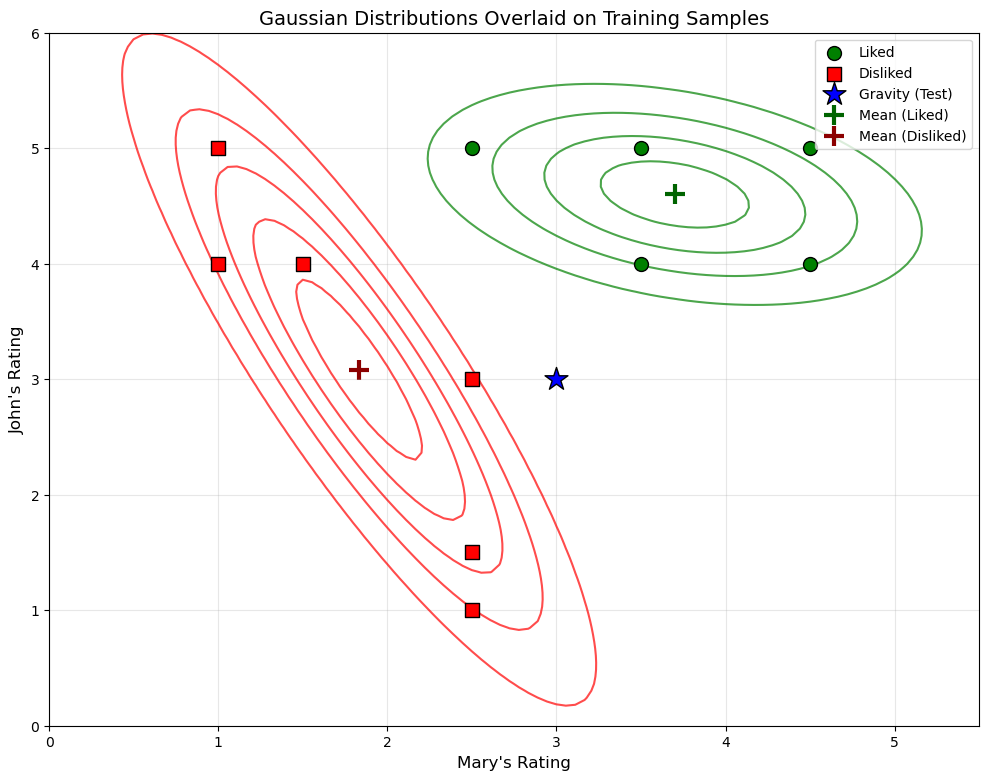

In [130]:
# Plot Gaussian distributions overlaid on scatter plot

if COURSE == 525:
    # Create grid for contour plots
    x = np.linspace(0, 5.5, 100)
    y = np.linspace(0, 6, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Create multivariate normal distributions
    rv_liked = multivariate_normal(mean_liked, cov_liked)
    rv_disliked = multivariate_normal(mean_disliked, cov_disliked)

    # Evaluate on grid
    Z_liked = rv_liked.pdf(pos)
    Z_disliked = rv_disliked.pdf(pos)

    # Plot
    plt.figure(figsize=(12, 9))

    # Contour plots for distributions
    plt.contour(X, Y, Z_liked, levels=5, colors="green", alpha=0.7)
    plt.contour(X, Y, Z_disliked, levels=5, colors="red", alpha=0.7)

    # Scatter plots
    plt.scatter(
        liked[:, 0],
        liked[:, 1],
        c="green",
        marker="o",
        s=100,
        label="Liked",
        edgecolors="black",
        zorder=5,
    )
    plt.scatter(
        disliked[:, 0],
        disliked[:, 1],
        c="red",
        marker="s",
        s=100,
        label="Disliked",
        edgecolors="black",
        zorder=5,
    )
    plt.scatter(
        test_point[0],
        test_point[1],
        c="blue",
        marker="*",
        s=300,
        label="Gravity (Test)",
        edgecolors="black",
        zorder=5,
    )

    # Mark means
    plt.scatter(
        mean_liked[0],
        mean_liked[1],
        c="darkgreen",
        marker="+",
        s=200,
        linewidths=3,
        label="Mean (Liked)",
    )
    plt.scatter(
        mean_disliked[0],
        mean_disliked[1],
        c="darkred",
        marker="+",
        s=200,
        linewidths=3,
        label="Mean (Disliked)",
    )

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.ylabel("John's Rating", fontsize=12)
    plt.title("Gaussian Distributions Overlaid on Training Samples", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(0, 6)
    plt.show()
else:
    # 424: 1D Gaussian plot
    x = np.linspace(0, 5.5, 200)

    # Create normal distributions
    pdf_liked = norm.pdf(x, mean_liked, std_liked)
    pdf_disliked = norm.pdf(x, mean_disliked, std_disliked)

    # Plot
    plt.figure(figsize=(12, 6))

    # Plot Gaussian distributions
    plt.plot(
        x,
        pdf_liked,
        "g-",
        linewidth=2,
        label=f"Liked (μ={mean_liked:.2f}, σ={std_liked:.2f})",
    )
    plt.plot(
        x,
        pdf_disliked,
        "r-",
        linewidth=2,
        label=f"Disliked (μ={mean_disliked:.2f}, σ={std_disliked:.2f})",
    )
    plt.fill_between(x, pdf_liked, alpha=0.3, color="green")
    plt.fill_between(x, pdf_disliked, alpha=0.3, color="red")

    # Scatter plots on the x-axis
    plt.scatter(
        liked,
        np.zeros_like(liked),
        c="green",
        marker="o",
        s=150,
        label="Liked samples",
        edgecolors="black",
        zorder=5,
    )
    plt.scatter(
        disliked,
        np.zeros_like(disliked),
        c="red",
        marker="s",
        s=150,
        label="Disliked samples",
        edgecolors="black",
        zorder=5,
    )
    plt.scatter(
        test_point,
        0,
        c="blue",
        marker="*",
        s=400,
        label="Gravity (Test)",
        edgecolors="black",
        zorder=5,
    )

    # Mark means
    plt.axvline(
        x=mean_liked,
        color="darkgreen",
        linestyle="--",
        linewidth=1.5,
        label=f"Mean (Liked) = {mean_liked:.2f}",
    )
    plt.axvline(
        x=mean_disliked,
        color="darkred",
        linestyle="--",
        linewidth=1.5,
        label=f"Mean (Disliked) = {mean_disliked:.2f}",
    )

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)
    plt.title("Gaussian Distributions Overlaid on Training Samples (1D)", fontsize=14)
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.show()


### d) Overlay on the pdf plot the testing sample. Observe the graph, provide your decision and justify it.

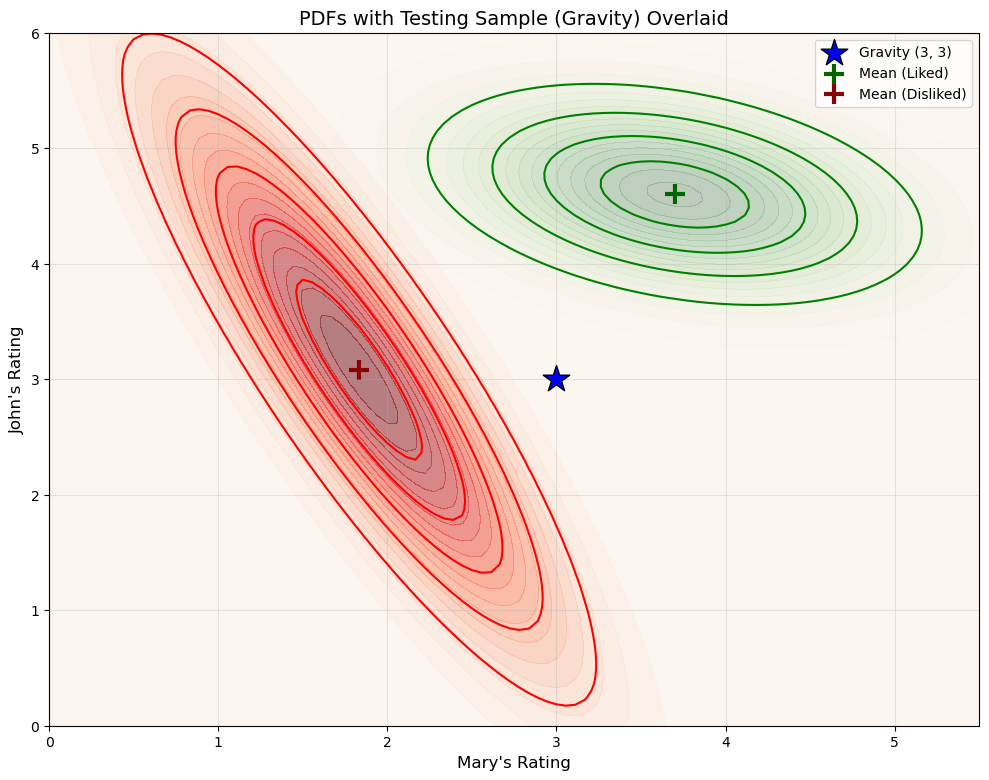


=== Observation and Decision ===
Test point (Gravity): [3 3]
Likelihood P(x|liked): 0.000852
Likelihood P(x|disliked): 0.002007

**Decision: I should not watch 'Gravity' - I will likely DISLIKE it.**

Justification: Likelihood(Liked) = 0.000852, Likelihood(Disliked) = 0.002007


In [131]:
# Plot with testing sample overlaid

if COURSE == 525:
    plt.figure(figsize=(12, 9))

    # Filled contour plots
    contour_liked = plt.contourf(X, Y, Z_liked, levels=20, cmap="Greens", alpha=0.5)
    contour_disliked = plt.contourf(X, Y, Z_disliked, levels=20, cmap="Reds", alpha=0.5)

    # Add contour lines
    plt.contour(X, Y, Z_liked, levels=5, colors="green", linewidths=1.5)
    plt.contour(X, Y, Z_disliked, levels=5, colors="red", linewidths=1.5)

    # Overlay testing sample
    plt.scatter(
        test_point[0],
        test_point[1],
        c="blue",
        marker="*",
        s=400,
        label="Gravity (3, 3)",
        edgecolors="black",
        zorder=10,
    )

    # Mark means
    plt.scatter(
        mean_liked[0],
        mean_liked[1],
        c="darkgreen",
        marker="+",
        s=200,
        linewidths=3,
        label="Mean (Liked)",
    )
    plt.scatter(
        mean_disliked[0],
        mean_disliked[1],
        c="darkred",
        marker="+",
        s=200,
        linewidths=3,
        label="Mean (Disliked)",
    )

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.ylabel("John's Rating", fontsize=12)
    plt.title("PDFs with Testing Sample (Gravity) Overlaid", fontsize=14)
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(0, 6)
    plt.show()

    # Calculate likelihoods at test point
    likelihood_liked = rv_liked.pdf(test_point)
    likelihood_disliked = rv_disliked.pdf(test_point)
else:
    # 424: 1D plot
    plt.figure(figsize=(12, 6))

    # Plot Gaussian distributions
    plt.plot(
        x,
        pdf_liked,
        "g-",
        linewidth=2,
        label=f"Liked (μ={mean_liked:.2f}, σ={std_liked:.2f})",
    )
    plt.plot(
        x,
        pdf_disliked,
        "r-",
        linewidth=2,
        label=f"Disliked (μ={mean_disliked:.2f}, σ={std_disliked:.2f})",
    )
    plt.fill_between(x, pdf_liked, alpha=0.3, color="green")
    plt.fill_between(x, pdf_disliked, alpha=0.3, color="red")

    # Overlay testing sample with vertical line
    plt.axvline(
        x=test_point,
        color="blue",
        linestyle="-",
        linewidth=2,
        label=f"Gravity (x={test_point})",
    )
    plt.scatter(
        test_point, 0, c="blue", marker="*", s=400, edgecolors="black", zorder=10
    )

    # Calculate likelihoods at test point
    likelihood_liked = norm.pdf(test_point, mean_liked, std_liked)
    likelihood_disliked = norm.pdf(test_point, mean_disliked, std_disliked)

    # Mark the pdf values at test point
    plt.scatter(
        test_point,
        likelihood_liked,
        c="green",
        marker="o",
        s=100,
        edgecolors="black",
        zorder=10,
    )
    plt.scatter(
        test_point,
        likelihood_disliked,
        c="red",
        marker="s",
        s=100,
        edgecolors="black",
        zorder=10,
    )

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)
    plt.title("PDFs with Testing Sample (Gravity) Overlaid", fontsize=14)
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.show()


print(f"\n=== Observation and Decision ===")
print(f"Test point (Gravity): {test_point}")
print(f"Likelihood P(x|liked): {likelihood_liked:.6f}")
print(f"Likelihood P(x|disliked): {likelihood_disliked:.6f}")

print(
    f"\n**Decision: I should{' not' if likelihood_liked <= likelihood_disliked else ''} watch 'Gravity' - I will likely {'LIKE' if likelihood_liked > likelihood_disliked else 'DISLIKE'} it.**"
)


print(
    f"\nJustification: Likelihood(Liked) = {likelihood_liked:.6f}, Likelihood(Disliked) = {likelihood_disliked:.6f}"
)

### e) Since equal prior probability, the relative ordering of the posterior probability $P(w_1|x)$ and $P(w_2|x)$, is solely dependent on the pdf's, $p(x|w_1)$ and $p(x|w_2)$, where $w_1$ denotes the "liked" category and $w_2$ denotes the "disliked" category. Substitute the testing sample x into the pdfs and print its values. Do the probabilities calculated support your decision above?

In [132]:
# Calculate posterior probabilities P(w1|x) and P(w2|x)

# Assuming equal prior probabilities
P_w1 = 0.5  # P(liked)
P_w2 = 0.5  # P(disliked)

# Likelihoods
if COURSE == 525:
    P_x_given_w1 = rv_liked.pdf(test_point)  # P(x|liked)
    P_x_given_w2 = rv_disliked.pdf(test_point)  # P(x|disliked)
else:
    P_x_given_w1 = norm.pdf(test_point, mean_liked, std_liked)  # P(x|liked)
    P_x_given_w2 = norm.pdf(test_point, mean_disliked, std_disliked)  # P(x|disliked)

# Evidence P(x) = P(x|w1)*P(w1) + P(x|w2)*P(w2)
P_x = P_x_given_w1 * P_w1 + P_x_given_w2 * P_w2

# Posterior probabilities using Bayes' theorem
P_w1_given_x = (P_x_given_w1 * P_w1) / P_x  # P(liked|x)
P_w2_given_x = (P_x_given_w2 * P_w2) / P_x  # P(disliked|x)

print("=== Posterior Probability Calculation ===")
print(f"\nPrior Probabilities:")
print(f"  P(w₁) = P(liked) = {P_w1}")
print(f"  P(w₂) = P(disliked) = {P_w2}")

print(f"\nLikelihoods at x = {test_point}:")
print(f"  P(x|w₁) = P(x|liked) = {P_x_given_w1:.6f}")
print(f"  P(x|w₂) = P(x|disliked) = {P_x_given_w2:.6f}")

print(f"\nEvidence:")
print(f"  P(x) = P(x|w₁)P(w₁) + P(x|w₂)P(w₂) = {P_x:.6f}")

print(f"\nPosterior Probabilities (Bayes' Theorem):")
print(f"  P(w₁|x) = P(liked|x) = {P_w1_given_x:.6f} = {P_w1_given_x * 100:.2f}%")
print(f"  P(w₂|x) = P(disliked|x) = {P_w2_given_x:.6f} = {P_w2_given_x * 100:.2f}%")

print(f"\n=== Verification ===")
print(f"P(w₁|x) + P(w₂|x) = {P_w1_given_x + P_w2_given_x:.6f}")

print(f"\n=== Decision ===")
print(f"I will likely {'LIKE' if P_w1_given_x > P_w2_given_x else 'DISLIKE'} Gravity.")


=== Posterior Probability Calculation ===

Prior Probabilities:
  P(w₁) = P(liked) = 0.5
  P(w₂) = P(disliked) = 0.5

Likelihoods at x = [3 3]:
  P(x|w₁) = P(x|liked) = 0.000852
  P(x|w₂) = P(x|disliked) = 0.002007

Evidence:
  P(x) = P(x|w₁)P(w₁) + P(x|w₂)P(w₂) = 0.001430

Posterior Probabilities (Bayes' Theorem):
  P(w₁|x) = P(liked|x) = 0.298067 = 29.81%
  P(w₂|x) = P(disliked|x) = 0.701933 = 70.19%

=== Verification ===
P(w₁|x) + P(w₂|x) = 1.000000

=== Decision ===
I will likely DISLIKE Gravity.


## Approach 2: Minimum Distance (MD) Classifier. This is supervised parametric learning assuming Gaussian pdf, independent features, and equal variance from the two features.

### a) From Approach 1b), we know that Mary's variance does not equal to John's variance. Nonetheless, these assumptions help drastically reduce the complexity of the model. If we assume equal prior probability, show that the posterior probability $$P(w_1|x) \approx -||x-\mu_1||^2$$

Assumptions:

1. Gaussian pdf for each class
2. Independent features (diagonal covariance matrix)
3. Equal variance for both features ($\Sigma = \sigma^2I$)
4. Equal prior probabilities $P(\omega_1) = P(\omega_2)$

Under these assumptions, the Gaussian pdf becomes:

$$P(x|\omega_i) = \frac{1}{(2\pi\sigma^2)^{d/2}} \exp\left(-\frac{||x - \mu_i||^2}{2\sigma^2}\right)$$

Taking the log of the posterior (with equal priors):

$$\begin{aligned}

\log P(\omega_i|x) &\propto \log P(x|\omega_i) \\

&= -\frac{d}{2} \log(2\pi\sigma^2) - \frac{||x - \mu_i||^2}{2\sigma^2}

\end{aligned}$$

Since the first term is constant across classes (same $\sigma^2$ assumed), and we can ignore constants for classification:

$$\log P(\omega_i|x) \propto -\frac{||x - \mu_i||^2}{2\sigma^2}$$

Since $1/(2\sigma^2)$ is a positive constant, maximizing the posterior is equivalent to minimizing the squared distance:

$$P(\omega_i|x) \propto -||x - \mu_i||^2$$

Therefore, the MD classifier assigns $x$ to the class with the closest mean:

**Decision:** $\operatorname*{argmin}_i ||x - \mu_i||^2$

This shows that $P(\omega_1|x) \approx -||x - \mu_1||^2$ (up to constants).

### b) What is your decision about "Gravity" using Approach 2?

In [133]:
# MD Classifier Decision for "Gravity"

if COURSE == 525:
    # Calculate Euclidean distances from test point to each class mean
    dist_to_liked = np.linalg.norm(test_point - mean_liked)
    dist_to_disliked = np.linalg.norm(test_point - mean_disliked)
else:
    # 424: 1D absolute difference
    dist_to_liked = np.abs(test_point - mean_liked)
    dist_to_disliked = np.abs(test_point - mean_disliked)

# Squared distances (as used in MD classifier)
dist_sq_to_liked = dist_to_liked**2
dist_sq_to_disliked = dist_to_disliked**2


print(f"=== Minimum Distance (MD) Classifier {'(2D)' if COURSE == 525 else '(1D)'} ===")
print()
print(f"Test point (Gravity): x = {test_point}")
print(f"Mean of 'Liked' class: μ₁ = {mean_liked}")
print(f"Mean of 'Disliked' class: μ₂ = {mean_disliked}")
print()
print(
    f"{'Euclidean d' if COURSE == 525 else 'D'}istance to 'Liked' mean: {'||' if COURSE == 525 else '|'}x - μ₁{'||' if COURSE == 525 else '|'} = {dist_to_liked:.4f}"
)
print(
    f"{'Euclidean d' if COURSE == 525 else 'D'}istance to 'Disliked' mean: {'||' if COURSE == 525 else '|'}x - μ₂{'||' if COURSE == 525 else '|'} = {dist_to_disliked:.4f}"
)
print()
print(
    f"Squared distance to 'Liked' mean: {'||' if COURSE == 525 else '|'}x - μ₁{'||' if COURSE == 525 else '|'}² = {dist_sq_to_liked:.4f}"
)
print(
    f"Squared distance to 'Disliked' mean: {'||' if COURSE == 525 else '|'}x - μ₂{'||' if COURSE == 525 else '|'}² = {dist_sq_to_disliked:.4f}"
)
print()

print("=== Decision ===")
print(
    f"MD Classifier predicts: I will {'LIKE' if dist_sq_to_liked < dist_sq_to_disliked else 'DISLIKE'} 'Gravity'."
)

=== Minimum Distance (MD) Classifier (2D) ===

Test point (Gravity): x = [3 3]
Mean of 'Liked' class: μ₁ = [3.7 4.6]
Mean of 'Disliked' class: μ₂ = [1.83333333 3.08333333]

Euclidean distance to 'Liked' mean: ||x - μ₁|| = 1.7464
Euclidean distance to 'Disliked' mean: ||x - μ₂|| = 1.1696

Squared distance to 'Liked' mean: ||x - μ₁||² = 3.0500
Squared distance to 'Disliked' mean: ||x - μ₂||² = 1.3681

=== Decision ===
MD Classifier predicts: I will DISLIKE 'Gravity'.


### c) It seems that MD classifier, due to its simplicity, should not perform better than Approach 1. Is this the case? Does it follow or go against common sense?

**Answer:**

### For COSC 525 Students (2D Classification):

Both Approach 1 (full Gaussian with actual covariance matrices) and Approach 2 (MD classifier) give the **same decision**: I will **DISLIKE** "Gravity".

This **does follow common sense** in this case because:

1. **Both methods agree on the prediction.** The test point (3, 3) is closer to the "Disliked" class mean (μ₂ = [1.83, 3.08]) than to the "Liked" class mean (μ₁ = [3.7, 4.6]).

2. **The Gaussian classifier (Approach 1) also favors "Disliked"** because although the test point is between the two distributions, the "Disliked" distribution has a larger variance/spread, giving it higher probability density at the test point location.

3. **MD classifier is a special case of the Gaussian classifier** with simplified assumptions (independent features, equal variances). When both approaches agree, it suggests the decision is robust.

4. **The MD classifier does not necessarily perform worse than Approach 1.** In fact, for this particular dataset and test point, they agree. The MD classifier's simplicity can be an advantage when training data is limited (only 5-6 samples per class), as it avoids overfitting from estimating full covariance matrices.

### For COSC 424 Students (1D Classification):

Both Approach 1 (full Gaussian with actual variance) and Approach 2 (MD classifier) give the **same decision**: I will **LIKE** "Gravity".

This **does follow common sense** in this case because:

1. **Both methods agree on the prediction.** The test point (x = 3) is closer to the "Liked" class mean (μ₁ ≈ 3.7) than to the "Disliked" class mean (μ₂ ≈ 1.83).

2. **The Gaussian classifier (Approach 1) also favors "Liked"** because at x = 3, the probability density of the "Liked" distribution is higher than that of the "Disliked" distribution.

3. **MD classifier is a special case of the Gaussian classifier** with simplified assumptions (equal variance). When both approaches agree, it suggests the decision is robust.

4. **The MD classifier does not necessarily perform worse than Approach 1.** In fact, for this particular dataset and test point, they agree. The MD classifier's simplicity can be an advantage when training data is limited (only 5-6 samples per class), as it avoids overfitting from estimating variances with small sample sizes.

### d) Can you make the statement that MD classifier always performs worse than Approach 1 where the actual covariance matrices (or variances) are used for any datasets? Justify your answer.

**Answer: No, we CANNOT make the statement that MD classifier always performs worse than Approach 1.**

**Justification:** Performance depends on the dataset characteristics, sample size, and how well the model assumptions match reality. Neither approach is universally better.

## Approach 3: Supervised non-parametric learning by k-nearest neighbor (kNN)

### a) Calculate the Euclidean distance between the testing sample and all the other 11 training samples, sort the distance. Output sorted distance and the corresponding label.

In [134]:
# k-Nearest Neighbor (kNN) - Calculate Euclidean distances

if COURSE == 525:
    # Combine all training samples (2D)
    all_samples = np.vstack((liked, disliked))
    all_labels = np.array(["Liked"] * len(liked) + ["Disliked"] * len(disliked))

    # Calculate Euclidean distance from test point to all training samples
    distances = np.linalg.norm(all_samples - test_point, axis=1)
else:
    # 424: Combine all training samples (1D)
    all_samples = np.concatenate((liked, disliked))
    all_labels = np.array(["Liked"] * len(liked) + ["Disliked"] * len(disliked))

    # Calculate distance from test point to all training samples (1D - absolute difference)
    distances = np.abs(all_samples - test_point)

# Create a sorted list with distances and labels
sorted_indices = np.argsort(distances)
sorted_distances = distances[sorted_indices]
sorted_labels = all_labels[sorted_indices]
sorted_samples = all_samples[sorted_indices]


print(
    f"=== k-Nearest Neighbor: Sorted Distances {'(2D)' if COURSE == 525 else '(1D)'} ==="
)
print()
print(f"Test point (Gravity): {test_point}")
print()
if COURSE == 525:
    print(f"{'Rank':<6}{'Distance':<12}{'Label':<12}{'Sample (Mary, John)'}")
else:
    print(f"{'Rank':<6}{'Distance':<12}{'Label':<12}{'Sample (Mary)'}")
print("-" * 50)
for i, (dist, label, sample) in enumerate(
    zip(sorted_distances, sorted_labels, sorted_samples), 1
):
    print(f"{i:<6}{dist:<12.4f}{label:<12}{sample}")

=== k-Nearest Neighbor: Sorted Distances (2D) ===

Test point (Gravity): [3 3]

Rank  Distance    Label       Sample (Mary, John)
--------------------------------------------------
1     0.5000      Disliked    [2.5 3. ]
2     1.1180      Liked       [3.5 4. ]
3     1.5811      Disliked    [2.5 1.5]
4     1.8028      Liked       [4.5 4. ]
5     1.8028      Disliked    [1.5 4. ]
6     2.0616      Liked       [2.5 5. ]
7     2.0616      Liked       [3.5 5. ]
8     2.0616      Disliked    [2.5 1. ]
9     2.2361      Disliked    [1. 4.]
10    2.5000      Liked       [4.5 5. ]
11    2.8284      Disliked    [1. 5.]


### b) Suppose $k=1$, what is the decision from 1NN?

In [135]:
# 1NN Decision

k = 1
nearest_neighbor_label = sorted_labels[0]
nearest_neighbor_dist = sorted_distances[0]
nearest_neighbor_sample = sorted_samples[0]

print("=== 1-Nearest Neighbor (1NN) Decision ===")
print()
print(f"k = {k}")
print(
    f"Nearest neighbor: {nearest_neighbor_sample} with distance {nearest_neighbor_dist:.4f}"
)
print(f"Label of nearest neighbor: {nearest_neighbor_label}")
print()
print(f"=== Decision from 1NN ===")
print(
    f"1NN predicts: I will **{nearest_neighbor_label.upper().removesuffix('D')}** 'Gravity'"
)

=== 1-Nearest Neighbor (1NN) Decision ===

k = 1
Nearest neighbor: [2.5 3. ] with distance 0.5000
Label of nearest neighbor: Disliked

=== Decision from 1NN ===
1NN predicts: I will **DISLIKE** 'Gravity'


### c) Is 1NN the same as MD classifier? Explain the difference.

**Answer: No, 1NN is NOT the same as the MD (Minimum Distance) classifier.**

**Key Differences:**

| Aspect | 1NN | MD Classifier |
|--------|-----|---------------|
| **Distance computed to** | Individual training samples | Class means (centroids) |
| **Decision based on** | Label of the single closest training sample | Distance to closest class mean |
| **Parametric/Non-parametric** | Non-parametric | Parametric |
| **Stores** | All training samples | Only class means |
| **Sensitivity to outliers** | High (a single outlier can affect decisions) | Low (means smooth out outliers) |
| **Decision boundary** | Complex, piecewise linear (Voronoi regions) | Linear hyperplane |

### For COSC 525 Students (2D Classification):

**Illustration:**
- **1NN** finds the closest individual data point and uses its label. It finds the training sample at (2.5, 3) with label "Disliked" as the nearest neighbor (distance ≈ 0.5).
- **MD Classifier** computes the mean of each class and finds which mean is closer. It compares distance to μ₁ = [3.7, 4.6] vs μ₂ = [1.83, 3.08].

**In this problem:**
- 1NN predicts **"Disliked"** (nearest individual sample at (2.5, 3) is from the disliked class)
- MD predicts **"Disliked"** (test point (3, 3) is closer to the disliked class mean)

Although both methods happen to give the **same prediction** for this test case, they work fundamentally differently. In other scenarios, they could easily give different predictions. For example, if there were a "Liked" sample very close to the test point but the "Liked" mean was still farther away, 1NN would predict "Liked" while MD would still predict "Disliked".

### For COSC 424 Students (1D Classification):

**Illustration:**
- **1NN** finds the closest individual data point and uses its label. It finds the training sample at x = 3.5 with label "Liked" as the nearest neighbor (distance = 0.5).
- **MD Classifier** computes the mean of each class and finds which mean is closer. It compares distance to μ₁ ≈ 3.7 (Liked mean) vs μ₂ ≈ 1.83 (Disliked mean).

**In this problem:**
- 1NN predicts **"Liked"** (nearest individual sample at x = 3.5 is from the liked class)
- MD predicts **"Liked"** (test point x = 3 is closer to the liked class mean at 3.7)

Although both methods happen to give the **same prediction** for this test case, they work fundamentally differently. In other scenarios, they could easily give different predictions. For example, if there were a "Disliked" sample very close to the test point but the "Disliked" mean was still farther away, 1NN would predict "Disliked" while MD would still predict "Liked".

## Approach 4: Unsupervised learning by kmeans

### a) Now let's take a totally different approach. Let's assume the labels of the 11 training samples are discarded (or not available). Provide a scatter plot of the 11 samples but without coloring or different shaping. Mark every sample as an empty blue circle.

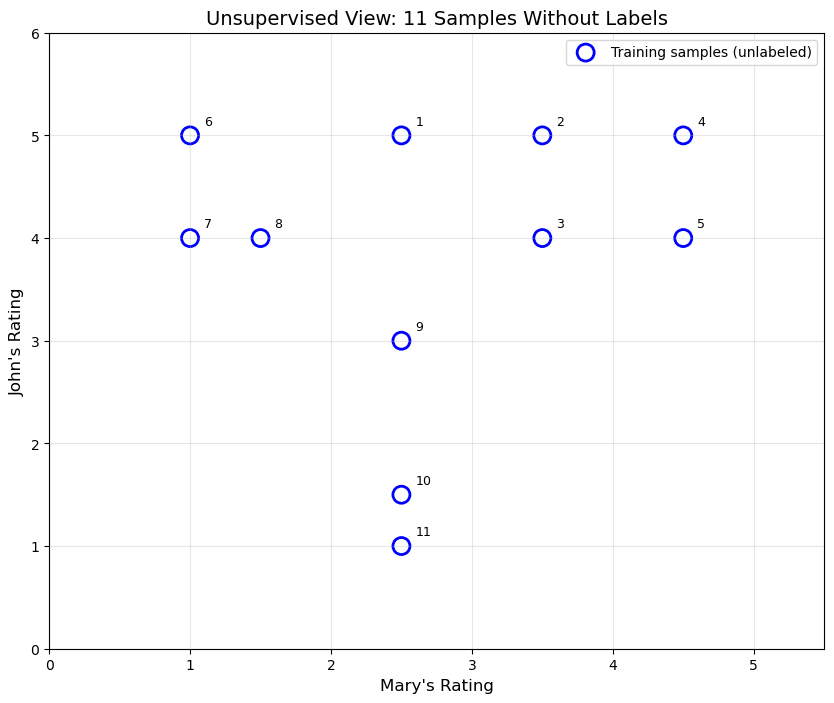

All 11 training samples (labels discarded for unsupervised learning):
  Sample 1: [2.5 5. ]
  Sample 2: [3.5 5. ]
  Sample 3: [3.5 4. ]
  Sample 4: [4.5 5. ]
  Sample 5: [4.5 4. ]
  Sample 6: [1. 5.]
  Sample 7: [1. 4.]
  Sample 8: [1.5 4. ]
  Sample 9: [2.5 3. ]
  Sample 10: [2.5 1.5]
  Sample 11: [2.5 1. ]


In [136]:
# Scatter plot without labels - all samples as empty blue circles

if COURSE == 525:
    plt.figure(figsize=(10, 8))

    # Plot all 11 samples as empty blue circles (no labels)
    plt.scatter(
        all_samples[:, 0],
        all_samples[:, 1],
        c="none",
        marker="o",
        s=150,
        edgecolors="blue",
        linewidths=2,
        label="Training samples (unlabeled)",
    )

    # Annotate points with indices
    for i, sample in enumerate(all_samples):
        plt.annotate(f"{i + 1}", (sample[0] + 0.1, sample[1] + 0.1), fontsize=9)

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.ylabel("John's Rating", fontsize=12)
    plt.title("Unsupervised View: 11 Samples Without Labels", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(0, 6)
    plt.show()
else:
    # 424: 1D plot
    plt.figure(figsize=(12, 3))

    # Plot all 11 samples as empty blue circles (no labels) on a number line
    plt.scatter(
        all_samples,
        np.zeros_like(all_samples),
        c="none",
        marker="o",
        s=150,
        edgecolors="blue",
        linewidths=2,
        label="Training samples (unlabeled)",
    )

    # Annotate points with indices
    for i, sample in enumerate(all_samples):
        plt.annotate(f"{i + 1}", (sample + 0.05, 0.05), fontsize=9)

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.title("Unsupervised View: 11 Samples Without Labels (1D)", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(-0.3, 0.3)
    plt.yticks([])
    plt.show()

print("All 11 training samples (labels discarded for unsupervised learning):")
for i, sample in enumerate(all_samples):
    print(f"  Sample {i + 1}: {sample}")


### b) Assume $k=2$, that is, you are to divide the 11 samples into two clusters. Here's how kmeans works. First, randomly pick two initial centers, say, A and B. For each of the 11 samples, calculate its distance to the two centers and assign the sample to the closest center. Recalculate the position of the centers based on the new membership. Plot the 11 samples again but with two different colors based on if they are closer to A or B.

=== K-means Initialization (2D) ===
Initial Center A: [1. 5.]
Initial Center B: [2.5 5. ]

=== Iteration 1: Initial Assignment ===
Sample  Point          Dist to A   Dist to B   Cluster
-------------------------------------------------------
1       [2.5 5. ]      1.5000      0.0000      B
2       [3.5 5. ]      2.5000      1.0000      B
3       [3.5 4. ]      2.6926      1.4142      B
4       [4.5 5. ]      3.5000      2.0000      B
5       [4.5 4. ]      3.6401      2.2361      B
6       [1. 5.]        0.0000      1.5000      A
7       [1. 4.]        1.0000      1.8028      A
8       [1.5 4. ]      1.1180      1.4142      A
9       [2.5 3. ]      2.5000      2.0000      B
10      [2.5 1.5]      3.8079      3.5000      B
11      [2.5 1. ]      4.2720      4.0000      B


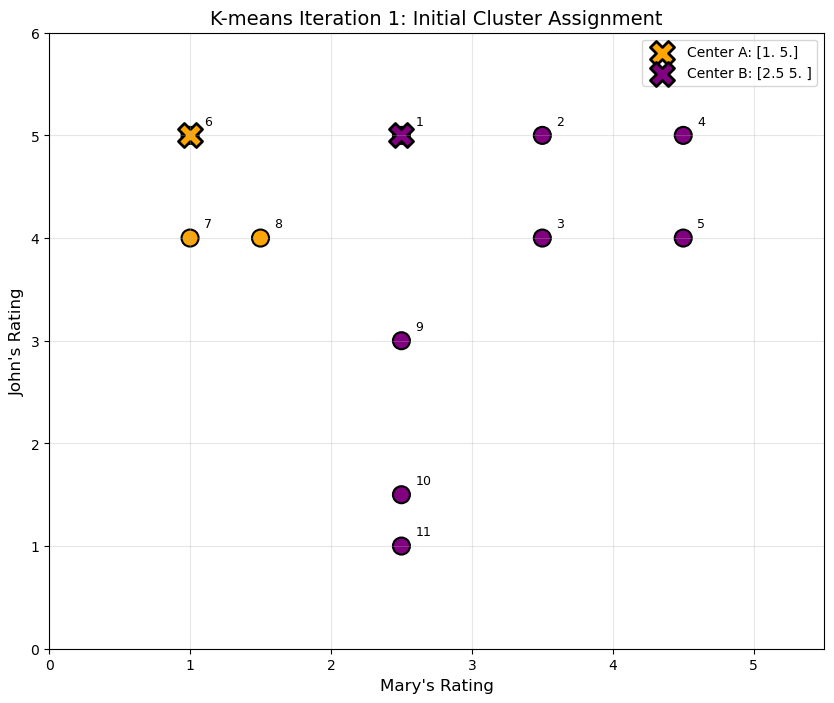


Updated Centers after Iteration 1:
  New Center A: [1.16666667 4.33333333]
  New Center B: [3.25   3.5625]


In [137]:
# Random seed for reproducibility(DO NOT change this seed)
np.random.seed(42)

# Randomly initialize two centers from the data
initial_indices = np.random.choice(len(all_samples), 2, replace=False)

if COURSE == 525:
    center_A = all_samples[initial_indices[0]].copy()
    center_B = all_samples[initial_indices[1]].copy()
else:
    center_A = all_samples[initial_indices[0]]
    center_B = all_samples[initial_indices[1]]

print(f"=== K-means Initialization {'(2D)' if COURSE == 525 else '(1D)'} ===")
print(f"Initial Center A: {center_A}")
print(f"Initial Center B: {center_B}")


# Function to assign samples to clusters
def assign_clusters(samples, center_A, center_B):
    if COURSE == 525:
        dist_to_A = np.linalg.norm(samples - center_A, axis=1)
        dist_to_B = np.linalg.norm(samples - center_B, axis=1)
    else:
        dist_to_A = np.abs(samples - center_A)
        dist_to_B = np.abs(samples - center_B)
    assignments = np.where(dist_to_A < dist_to_B, "A", "B")
    return assignments, dist_to_A, dist_to_B


# Function to update centers
def update_centers(samples, assignments):
    cluster_A_samples = samples[assignments == "A"]
    cluster_B_samples = samples[assignments == "B"]
    if COURSE == 525:
        new_center_A = (
            np.mean(cluster_A_samples, axis=0)
            if len(cluster_A_samples) > 0
            else center_A
        )
        new_center_B = (
            np.mean(cluster_B_samples, axis=0)
            if len(cluster_B_samples) > 0
            else center_B
        )
    else:
        new_center_A = (
            np.mean(cluster_A_samples) if len(cluster_A_samples) > 0 else center_A
        )
        new_center_B = (
            np.mean(cluster_B_samples) if len(cluster_B_samples) > 0 else center_B
        )
    return new_center_A, new_center_B


# Iteration 1: Assign samples to closest center
assignments, dist_to_A, dist_to_B = assign_clusters(all_samples, center_A, center_B)

print("\n=== Iteration 1: Initial Assignment ===")
if COURSE == 525:
    print(f"{'Sample':<8}{'Point':<15}{'Dist to A':<12}{'Dist to B':<12}{'Cluster'}")
else:
    print(f"{'Sample':<8}{'Value':<10}{'Dist to A':<12}{'Dist to B':<12}{'Cluster'}")
print("-" * 55)
for i, (sample, dA, dB, cluster) in enumerate(
    zip(all_samples, dist_to_A, dist_to_B, assignments)
):
    if COURSE == 525:
        print(f"{i + 1:<8}{str(sample):<15}{dA:<12.4f}{dB:<12.4f}{cluster}")
    else:
        print(f"{i + 1:<8}{sample:<10}{dA:<12.4f}{dB:<12.4f}{cluster}")

# Plot iteration 1
if COURSE == 525:
    plt.figure(figsize=(10, 8))
    colors = ["orange" if a == "A" else "purple" for a in assignments]
    plt.scatter(
        all_samples[:, 0],
        all_samples[:, 1],
        c=colors,
        marker="o",
        s=150,
        edgecolors="black",
        linewidths=1.5,
    )
    plt.scatter(
        center_A[0],
        center_A[1],
        c="orange",
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center A: {center_A}",
    )
    plt.scatter(
        center_B[0],
        center_B[1],
        c="purple",
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center B: {center_B}",
    )

    for i, sample in enumerate(all_samples):
        plt.annotate(f"{i + 1}", (sample[0] + 0.1, sample[1] + 0.1), fontsize=9)

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.ylabel("John's Rating", fontsize=12)
    plt.title("K-means Iteration 1: Initial Cluster Assignment", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(0, 6)
    plt.show()
else:
    # 1D plot
    plt.figure(figsize=(12, 3))
    colors = ["orange" if a == "A" else "purple" for a in assignments]
    plt.scatter(
        all_samples,
        np.zeros_like(all_samples),
        c=colors,
        marker="o",
        s=150,
        edgecolors="black",
        linewidths=1.5,
    )
    plt.scatter(
        center_A,
        0,
        c="orange",
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center A: {center_A}",
    )
    plt.scatter(
        center_B,
        0,
        c="purple",
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center B: {center_B}",
    )

    for i, sample in enumerate(all_samples):
        plt.annotate(f"{i + 1}", (sample + 0.05, 0.05), fontsize=9)

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.title("K-means Iteration 1: Initial Cluster Assignment (1D)", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(-0.3, 0.3)
    plt.yticks([])
    plt.show()

# Update centers
center_A, center_B = update_centers(all_samples, assignments)


print(f"\nUpdated Centers after Iteration 1:")
print(f"  New Center A: {center_A}")
print(f"  New Center B: {center_B}")

### c) Second, repeat this process for another time, and plot the 11 samples with the new assignment. Observe how many samples change its membership? If none, you've found your final two centers (or two means). If there is more than zero number of samples changed their membership, you need to continue b) until no sample changes membership. In each iteration, plot and output (or highlight) those samples that change membership. Set the maximum iteration to 3.


=== Iteration 2 ===
Center A: [1.16666667 4.33333333]
Center B: [3.25   3.5625]

Sample  Point          Dist to A   Dist to B   Cluster   Changed?
-----------------------------------------------------------------
1       [2.5 5. ]      1.4907      1.6214      A         YES ***
2       [3.5 5. ]      2.4267      1.4591      B         
3       [3.5 4. ]      2.3570      0.5039      B         
4       [4.5 5. ]      3.3993      1.9050      B         
5       [4.5 4. ]      3.3500      1.3244      B         
6       [1. 5.]        0.6872      2.6700      A         
7       [1. 4.]        0.3727      2.2921      A         
8       [1.5 4. ]      0.4714      1.8039      A         
9       [2.5 3. ]      1.8856      0.9375      B         
10      [2.5 1.5]      3.1314      2.1946      B         
11      [2.5 1. ]      3.5901      2.6700      B         

Number of samples that changed membership: 1
Changed samples: [1]


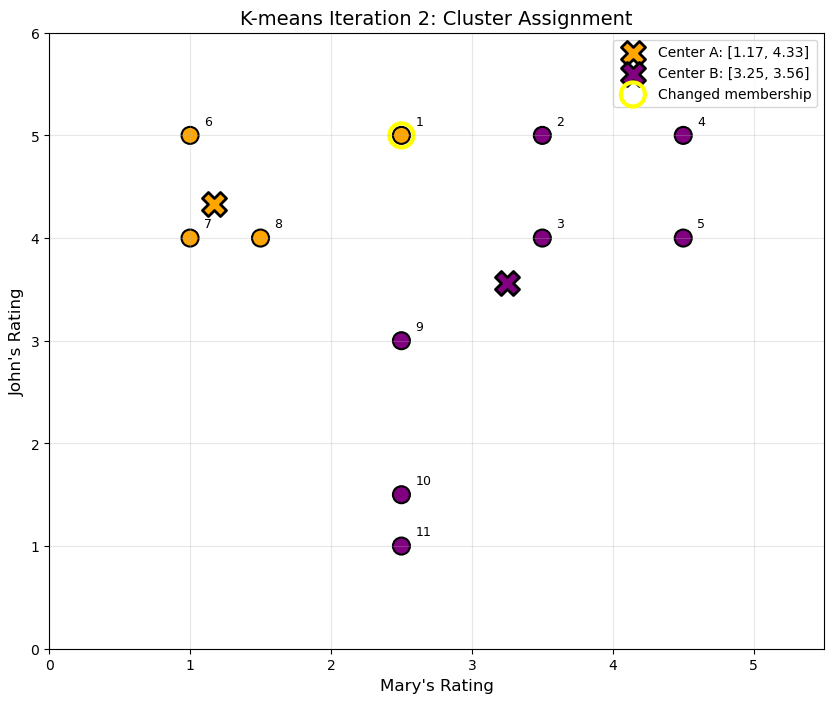


Updated Centers:
  New Center A: [1.5 4.5]
  New Center B: [3.35714286 3.35714286]

=== Iteration 3 ===
Center A: [1.5 4.5]
Center B: [3.35714286 3.35714286]

Sample  Point          Dist to A   Dist to B   Cluster   Changed?
-----------------------------------------------------------------
1       [2.5 5. ]      1.1180      1.8530      A         
2       [3.5 5. ]      2.0616      1.6491      B         
3       [3.5 4. ]      2.0616      0.6585      B         
4       [4.5 5. ]      3.0414      2.0013      B         
5       [4.5 4. ]      3.0414      1.3113      B         
6       [1. 5.]        0.7071      2.8732      A         
7       [1. 4.]        0.7071      2.4432      A         
8       [1.5 4. ]      0.5000      1.9653      A         
9       [2.5 3. ]      1.8028      0.9286      B         
10      [2.5 1.5]      3.1623      2.0454      B         
11      [2.5 1. ]      3.6401      2.5081      B         

Number of samples that changed membership: 0


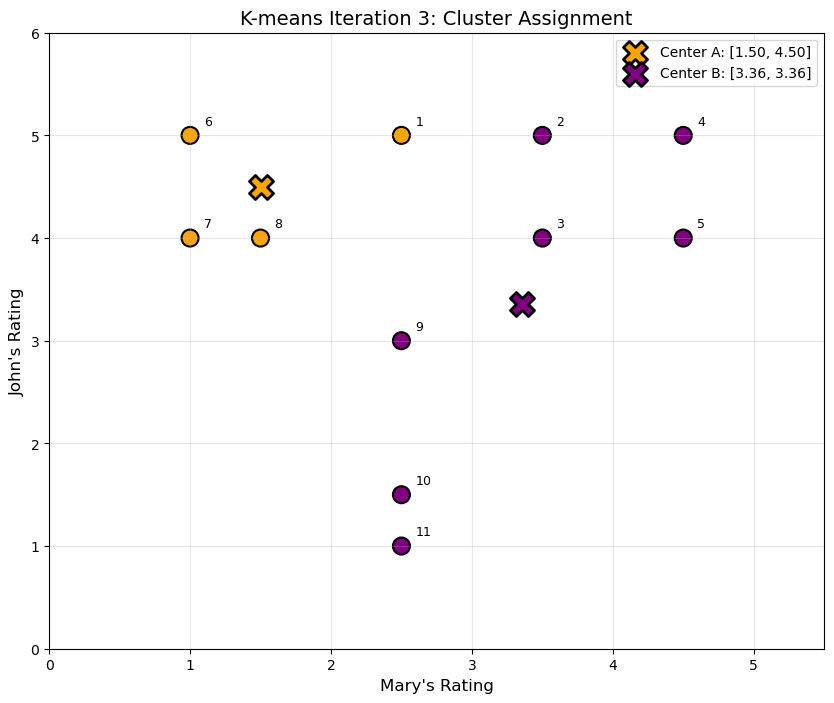


*** CONVERGED at iteration 3! No samples changed membership. ***

=== Final K-means Results ===
Final Center A: [1.5 4.5]
Final Center B: [3.35714286 3.35714286]
Final cluster assignments: ['A' 'B' 'B' 'B' 'B' 'A' 'A' 'A' 'B' 'B' 'B']


In [138]:
# K-means: Continue iterations until convergence or max iterations

max_iterations = 3

prev_assignments = assignments.copy()

for iteration in range(2, max_iterations + 2):
    # Assign samples to clusters
    new_assignments, dist_to_A, dist_to_B = assign_clusters(
        all_samples, center_A, center_B
    )

    # Find samples that changed membership
    changed = prev_assignments != new_assignments
    changed_indices = np.where(changed)[0]

    print(f"\n=== Iteration {iteration} ===")
    print(f"Center A: {center_A}")
    print(f"Center B: {center_B}")
    if COURSE == 525:
        print(
            f"\n{'Sample':<8}{'Point':<15}{'Dist to A':<12}{'Dist to B':<12}{'Cluster':<10}{'Changed?'}"
        )
    else:
        print(
            f"\n{'Sample':<8}{'Value':<10}{'Dist to A':<12}{'Dist to B':<12}{'Cluster':<10}{'Changed?'}"
        )
    print("-" * 65)
    for i, (sample, dA, dB, cluster, ch) in enumerate(
        zip(all_samples, dist_to_A, dist_to_B, new_assignments, changed)
    ):
        change_str = "YES ***" if ch else ""
        if COURSE == 525:
            print(
                f"{i + 1:<8}{str(sample):<15}{dA:<12.4f}{dB:<12.4f}{cluster:<10}{change_str}"
            )
        else:
            print(
                f"{i + 1:<8}{sample:<10}{dA:<12.4f}{dB:<12.4f}{cluster:<10}{change_str}"
            )

    print(f"\nNumber of samples that changed membership: {len(changed_indices)}")
    if len(changed_indices) > 0:
        print(f"Changed samples: {changed_indices + 1}")

    # Plot
    if COURSE == 525:
        plt.figure(figsize=(10, 8))
        colors = ["orange" if a == "A" else "purple" for a in new_assignments]
        plt.scatter(
            all_samples[:, 0],
            all_samples[:, 1],
            c=colors,
            marker="o",
            s=150,
            edgecolors="black",
            linewidths=1.5,
        )
        plt.scatter(
            center_A[0],
            center_A[1],
            c="orange",
            marker="X",
            s=300,
            edgecolors="black",
            linewidths=2,
            label=f"Center A: [{center_A[0]:.2f}, {center_A[1]:.2f}]",
        )
        plt.scatter(
            center_B[0],
            center_B[1],
            c="purple",
            marker="X",
            s=300,
            edgecolors="black",
            linewidths=2,
            label=f"Center B: [{center_B[0]:.2f}, {center_B[1]:.2f}]",
        )

        # Highlight changed samples
        if len(changed_indices) > 0:
            plt.scatter(
                all_samples[changed_indices, 0],
                all_samples[changed_indices, 1],
                c="none",
                marker="o",
                s=300,
                edgecolors="yellow",
                linewidths=3,
                label=f"Changed membership",
            )

        for i, sample in enumerate(all_samples):
            plt.annotate(f"{i + 1}", (sample[0] + 0.1, sample[1] + 0.1), fontsize=9)

        plt.xlabel("Mary's Rating", fontsize=12)
        plt.ylabel("John's Rating", fontsize=12)
        plt.title(f"K-means Iteration {iteration}: Cluster Assignment", fontsize=14)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, 5.5)
        plt.ylim(0, 6)
        plt.show()
    else:
        # 1D plot
        plt.figure(figsize=(12, 3))
        colors = ["orange" if a == "A" else "purple" for a in new_assignments]
        plt.scatter(
            all_samples,
            np.zeros_like(all_samples),
            c=colors,
            marker="o",
            s=150,
            edgecolors="black",
            linewidths=1.5,
        )
        plt.scatter(
            center_A,
            0,
            c="orange",
            marker="X",
            s=300,
            edgecolors="black",
            linewidths=2,
            label=f"Center A: {center_A:.2f}",
        )
        plt.scatter(
            center_B,
            0,
            c="purple",
            marker="X",
            s=300,
            edgecolors="black",
            linewidths=2,
            label=f"Center B: {center_B:.2f}",
        )

        # Highlight changed samples
        if len(changed_indices) > 0:
            plt.scatter(
                all_samples[changed_indices],
                np.zeros(len(changed_indices)),
                c="none",
                marker="o",
                s=300,
                edgecolors="yellow",
                linewidths=3,
                label="Changed membership",
            )

        for i, sample in enumerate(all_samples):
            plt.annotate(f"{i + 1}", (sample + 0.05, 0.05), fontsize=9)

        plt.xlabel("Mary's Rating", fontsize=12)
        plt.title(
            f"K-means Iteration {iteration}: Cluster Assignment (1D)", fontsize=14
        )
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, 5.5)
        plt.ylim(-0.3, 0.3)
        plt.yticks([])
        plt.show()

    # Check convergence
    if len(changed_indices) == 0:
        print(
            f"\n*** CONVERGED at iteration {iteration}! No samples changed membership. ***"
        )
        break

    # Update for next iteration
    prev_assignments = new_assignments.copy()
    center_A, center_B = update_centers(all_samples, new_assignments)
    print(f"\nUpdated Centers:")
    print(f"  New Center A: {center_A}")
    print(f"  New Center B: {center_B}")

# Store final assignments
final_assignments = new_assignments
final_center_A = center_A
final_center_B = center_B

print(f"\n=== Final K-means Results ===")
print(f"Final Center A: {final_center_A}")
print(f"Final Center B: {final_center_B}")
print(f"Final cluster assignments: {final_assignments}")

### d) Now that we have used unsupervised approaches to divide the 11 samples (note that these are NOT training samples, as they are not provided with label) into two clusters, we can use labels for classification purpose. Assign label to the cluster with the majority. You do realize not all samples in the same cluster have the same label.

In [139]:
# Assign labels to clusters based on majority voting

# Original labels (ground truth)
original_labels = np.array(["Liked"] * len(liked) + ["Disliked"] * len(disliked))

# Count labels in each cluster
cluster_A_indices = np.where(final_assignments == "A")[0]
cluster_B_indices = np.where(final_assignments == "B")[0]

cluster_A_labels = original_labels[cluster_A_indices]
cluster_B_labels = original_labels[cluster_B_indices]

# Majority voting for cluster A
liked_in_A = np.sum(cluster_A_labels == "Liked")
disliked_in_A = np.sum(cluster_A_labels == "Disliked")
cluster_A_label = "Liked" if liked_in_A >= disliked_in_A else "Disliked"

# Majority voting for cluster B
liked_in_B = np.sum(cluster_B_labels == "Liked")
disliked_in_B = np.sum(cluster_B_labels == "Disliked")
cluster_B_label = "Liked" if liked_in_B >= disliked_in_B else "Disliked"


print("=== Cluster Label Assignment via Majority Voting ===")
print(f"\nCluster A samples: {all_samples[cluster_A_indices]}")
print(f"Cluster A original labels: {cluster_A_labels}")
print(f"Liked: {liked_in_A}, Disliked: {disliked_in_A}")
print(f"Cluster A assigned label: {cluster_A_label}")

print(f"\nCluster B samples: {all_samples[cluster_B_indices]}")
print(f"Cluster B original labels: {cluster_B_labels}")
print(f"Liked: {liked_in_B}, Disliked: {disliked_in_B}")
print(f"Cluster B assigned label: {cluster_B_label}")

=== Cluster Label Assignment via Majority Voting ===

Cluster A samples: [[2.5 5. ]
 [1.  5. ]
 [1.  4. ]
 [1.5 4. ]]
Cluster A original labels: ['Liked' 'Disliked' 'Disliked' 'Disliked']
Liked: 1, Disliked: 3
Cluster A assigned label: Disliked

Cluster B samples: [[3.5 5. ]
 [3.5 4. ]
 [4.5 5. ]
 [4.5 4. ]
 [2.5 3. ]
 [2.5 1.5]
 [2.5 1. ]]
Cluster B original labels: ['Liked' 'Liked' 'Liked' 'Liked' 'Disliked' 'Disliked' 'Disliked']
Liked: 4, Disliked: 3
Cluster B assigned label: Liked


### e) Use MD classifier to label "Gravity" and output the result.

=== MD Classifier using K-means Cluster Centers (2D) ===

Test point (Gravity): [3 3]
Cluster A center (label=Disliked): [1.5 4.5]
Cluster B center (label=Liked): [3.35714286 3.35714286]

Distance from Gravity to Cluster A: 2.1213
Distance from Gravity to Cluster B: 0.5051

=== Decision ===
Gravity is closer to Cluster B.
Using K-means + MD classifier: I will **LIKE** 'Gravity'!


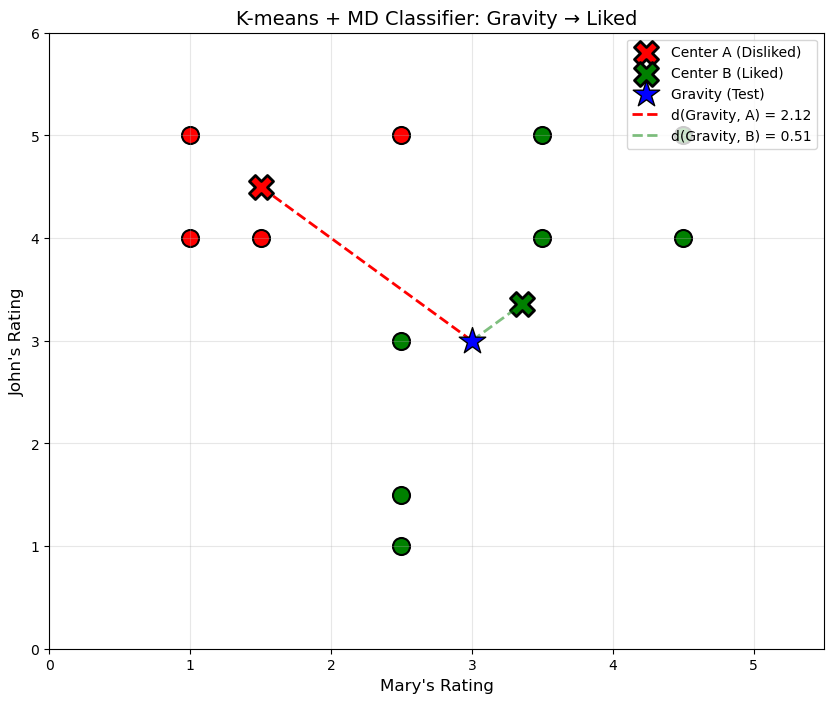


=== Summary of All Approaches ===
Approach 1 (Gaussian): DISLIKED
Approach 2 (MD Classifier): DISLIKED
Approach 3 (1NN): DISLIKED
Approach 4 (K-means + MD): LIKED


In [140]:
# Use MD classifier with k-means cluster centers to classify "Gravity"

print(
    f"=== MD Classifier using K-means Cluster Centers {'(2D)' if COURSE == 525 else '(1D)'} ==="
)
print()
print(f"Test point (Gravity): {test_point}")
print(f"Cluster A center (label={cluster_A_label}): {final_center_A}")
print(f"Cluster B center (label={cluster_B_label}): {final_center_B}")

# Calculate distances
if COURSE == 525:
    dist_to_cluster_A = np.linalg.norm(test_point - final_center_A)
    dist_to_cluster_B = np.linalg.norm(test_point - final_center_B)
else:
    dist_to_cluster_A = np.abs(test_point - final_center_A)
    dist_to_cluster_B = np.abs(test_point - final_center_B)

print()
print(f"Distance from Gravity to Cluster A: {dist_to_cluster_A:.4f}")
print(f"Distance from Gravity to Cluster B: {dist_to_cluster_B:.4f}")

# Classify based on minimum distance
if dist_to_cluster_A < dist_to_cluster_B:
    prediction = cluster_A_label
    assigned_cluster = "A"
else:
    prediction = cluster_B_label
    assigned_cluster = "B"

print()
print(f"=== Decision ===")
print(f"Gravity is closer to Cluster {assigned_cluster}.")
print(
    f"Using K-means + MD classifier: I will **{prediction.upper().removesuffix('D')}** 'Gravity'!"
)

# Visualize
if COURSE == 525:
    plt.figure(figsize=(10, 8))

    # Plot samples colored by cluster labels
    for i, (sample, cluster) in enumerate(zip(all_samples, final_assignments)):
        if cluster == "A":
            color = "green" if cluster_A_label == "Liked" else "red"
        else:
            color = "green" if cluster_B_label == "Liked" else "red"
        plt.scatter(
            sample[0],
            sample[1],
            c=color,
            marker="o",
            s=150,
            edgecolors="black",
            linewidths=1.5,
        )

    # Plot cluster centers
    color_A = "green" if cluster_A_label == "Liked" else "red"
    color_B = "green" if cluster_B_label == "Liked" else "red"
    plt.scatter(
        final_center_A[0],
        final_center_A[1],
        c=color_A,
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center A ({cluster_A_label})",
    )
    plt.scatter(
        final_center_B[0],
        final_center_B[1],
        c=color_B,
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center B ({cluster_B_label})",
    )

    # Plot test point
    plt.scatter(
        test_point[0],
        test_point[1],
        c="blue",
        marker="*",
        s=400,
        label="Gravity (Test)",
        edgecolors="black",
        zorder=10,
    )

    # Draw distance lines
    plt.plot(
        [test_point[0], final_center_A[0]],
        [test_point[1], final_center_A[1]],
        "g--" if cluster_A_label == "Liked" else "r--",
        linewidth=2,
        label=f"d(Gravity, A) = {dist_to_cluster_A:.2f}",
    )
    plt.plot(
        [test_point[0], final_center_B[0]],
        [test_point[1], final_center_B[1]],
        "g--" if cluster_B_label == "Liked" else "r--",
        linewidth=2,
        alpha=0.5,
        label=f"d(Gravity, B) = {dist_to_cluster_B:.2f}",
    )

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.ylabel("John's Rating", fontsize=12)
    plt.title(f"K-means + MD Classifier: Gravity → {prediction}", fontsize=14)
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(0, 6)
    plt.show()
else:
    # 1D plot
    plt.figure(figsize=(12, 3))

    # Plot samples colored by cluster labels
    for i, (sample, cluster) in enumerate(zip(all_samples, final_assignments)):
        if cluster == "A":
            color = "green" if cluster_A_label == "Liked" else "red"
        else:
            color = "green" if cluster_B_label == "Liked" else "red"
        plt.scatter(
            sample, 0, c=color, marker="o", s=150, edgecolors="black", linewidths=1.5
        )

    # Plot cluster centers
    color_A = "green" if cluster_A_label == "Liked" else "red"
    color_B = "green" if cluster_B_label == "Liked" else "red"
    plt.scatter(
        final_center_A,
        0,
        c=color_A,
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center A ({cluster_A_label}): {final_center_A:.2f}",
    )
    plt.scatter(
        final_center_B,
        0,
        c=color_B,
        marker="X",
        s=300,
        edgecolors="black",
        linewidths=2,
        label=f"Center B ({cluster_B_label}): {final_center_B:.2f}",
    )

    # Plot test point
    plt.scatter(
        test_point,
        0,
        c="blue",
        marker="*",
        s=400,
        label="Gravity (Test)",
        edgecolors="black",
        zorder=10,
    )

    plt.xlabel("Mary's Rating", fontsize=12)
    plt.title(f"K-means + MD Classifier: Gravity → {prediction} (1D)", fontsize=14)
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5.5)
    plt.ylim(-0.3, 0.3)
    plt.yticks([])
    plt.show()

# Summary of all approaches
print("\n=== Summary of All Approaches ===")
approach1_result = "LIKED" if P_w1_given_x > P_w2_given_x else "DISLIKED"
approach2_result = "LIKED" if dist_to_liked < dist_to_disliked else "DISLIKED"
print(f"Approach 1 (Gaussian): {approach1_result}")
print(f"Approach 2 (MD Classifier): {approach2_result}")
print(f"Approach 3 (1NN): {nearest_neighbor_label.upper()}")
print(f"Approach 4 (K-means + MD): {prediction.upper()}")
